In [1]:
# importing the necessary libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
sns.set(rc={"figure.figsize":(15, 9)})
sns.set(font_scale=1.5) 

In [2]:
# loading the dataset
food = pd.read_csv("data/food_consumption.csv")
food.head()

,country,food_category,consumption,co2_emission
0,Argentina,pork,10.51,37.20
1,Argentina,poultry,38.66,41.53
2,Argentina,beef,55.48,1712.00
3,Argentina,lamb_goat,1.56,54.63
4,Argentina,fish,4.36,6.96


In [3]:
# checking and cleaning any data if necessary
food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1430 entries, 0 to 1429
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   country        1430 non-null   object 
 1   food_category  1430 non-null   object 
 2   consumption    1430 non-null   float64
 3   co2_emission   1430 non-null   float64
dtypes: float64(2), object(2)
memory usage: 44.8+ KB


The dataset has several information, including consumption and food categories in 130 countries. 

In [4]:
# food["country"].nunique()
food["country"].unique()

array(['Argentina', 'Australia', 'Albania', 'Iceland', 'New Zealand',
       'USA', 'Uruguay', 'Luxembourg', 'Brazil', 'Kazakhstan', 'Sweden',
       'Bermuda', 'Denmark', 'Finland', 'Ireland', 'Greece', 'France',
       'Canada', 'Norway', 'Hong Kong SAR. China', 'French Polynesia',
       'Israel', 'Switzerland', 'Netherlands', 'Kuwait', 'United Kingdom',
       'Austria', 'Oman', 'Italy', 'Bahamas', 'Portugal', 'Malta',
       'Armenia', 'Slovenia', 'Chile', 'Venezuela', 'Belgium', 'Germany',
       'Russia', 'Croatia', 'Belarus', 'Spain', 'Paraguay',
       'New Caledonia', 'South Africa', 'Barbados', 'Lithuania', 'Turkey',
       'Estonia', 'Mexico', 'Costa Rica', 'Bolivia', 'Ecuador', 'Panama',
       'Czech Republic', 'Romania', 'Colombia', 'Maldives', 'Cyprus',
       'Serbia', 'United Arab Emirates', 'Algeria', 'Ukraine', 'Pakistan',
       'Swaziland', 'Latvia', 'Bosnia and Herzegovina', 'Fiji',
       'South Korea', 'Poland', 'Saudi Arabia', 'Botswana', 'Macedonia',
       '

We observed that the average **consumption** of poultry (21.22) seems to be higher than the average consumption of fish (17.29) across all countries:

In [5]:
food.groupby("food_category", as_index=False)["consumption"].describe()

,food_category,count,mean,std,min,25%,50%,75%,max
0,beef,130.0,12.123385,9.654140,0.78,4.9975,8.285,17.9400,55.48
1,dairy,130.0,125.774692,93.327721,3.04,45.7925,110.975,192.7150,430.76
2,eggs,130.0,8.163769,5.032582,0.16,3.9450,8.420,12.3125,19.15
3,fish,130.0,17.287077,19.013508,0.24,6.0250,13.950,21.8525,179.71
4,lamb_goat,130.0,2.600154,3.665252,0.00,0.5600,1.325,3.1025,21.12
5,nuts,130.0,4.137231,3.372817,0.18,1.8050,3.495,5.6100,23.03
6,pork,130.0,16.123692,15.717646,0.00,2.0900,10.355,28.2275,67.11
7,poultry,130.0,21.219231,14.571980,0.47,10.9100,19.855,29.7475,62.50
8,rice,130.0,29.375154,37.324471,0.95,4.7200,11.875,43.4425,171.73
9,soybeans,130.0,0.860538,2.083336,0.00,0.0100,0.075,0.6400,16.95


But is this difference **statistically significant**? Let's do a **permutation test** to assess it.

In [6]:
# H0 = avg poultry consumption = avg fish consumption 
# H1 = avg poultry consumption > avg fish consumption 

In [7]:
# extracting the consumption data for "poultry" and "fish" categories and storing them in two lists 
treatment = food[food["food_category"] == "poultry"]["consumption"].tolist()
control = food[food["food_category"] == "fish"]["consumption"].tolist()
print(treatment)
print(control)

[38.66, 46.12, 13.23, 26.87, 34.98, 50.01, 27.45, 21.37, 45.0, 18.38, 16.64, 32.62, 26.75, 19.87, 26.26, 15.74, 22.93, 36.68, 21.01, 54.86, 49.55, 62.5, 16.38, 23.9, 53.61, 31.55, 18.61, 31.51, 18.61, 45.74, 30.14, 26.4, 13.35, 23.46, 36.52, 39.28, 12.2, 17.75, 27.5, 8.52, 31.29, 28.63, 6.39, 44.36, 37.57, 42.62, 26.84, 18.78, 21.11, 30.12, 24.47, 34.31, 21.85, 30.81, 19.09, 15.38, 27.57, 18.47, 24.45, 10.64, 41.04, 7.42, 24.23, 5.01, 6.18, 20.53, 13.17, 20.26, 16.0, 27.41, 49.05, 5.33, 18.77, 23.78, 58.27, 18.5, 14.43, 38.51, 20.68, 20.77, 15.13, 1.08, 0.47, 33.39, 19.42, 12.28, 43.51, 19.84, 20.15, 13.2, 20.29, 32.13, 17.33, 52.51, 12.19, 28.31, 41.01, 4.97, 16.45, 1.51, 1.56, 25.38, 1.84, 4.62, 11.72, 21.31, 12.36, 0.66, 21.87, 13.02, 3.29, 3.29, 3.14, 1.38, 1.83, 1.73, 1.34, 11.91, 8.63, 6.63, 2.66, 1.88, 13.69, 1.41, 1.84, 4.97, 4.96, 7.5, 8.91, 1.4]
[4.36, 17.69, 3.85, 74.41, 20.36, 12.35, 6.53, 23.09, 10.01, 5.21, 23.86, 33.22, 16.49, 33.8, 17.39, 14.42, 22.91, 14.56, 38.18, 42.

In [8]:
# the count of unique countries is 130 so each list should be 130 in length
len(treatment)

130

In [9]:
# calculating the average consumption per list/group - this is the initially observed result
mu_treatment = np.mean(treatment)
mu_control = np.mean(control)
print("avg poultry consumption is:", mu_treatment)
print("avg fish consumption is:", mu_control)

avg poultry consumption is: 21.21923076923077
avg fish consumption is: 17.28707692307692


In [10]:
# defining the test statistics 
mu_diff = mu_treatment - mu_control
print(mu_diff)

3.9321538461538488


In [11]:
# creating a new df with the two lists
df = pd.DataFrame({"group": ["treatment" if el <= len(treatment) else "control" for el in range(1,(len(treatment)*2)+1)], 
                   "responses": treatment + control})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   group      260 non-null    object 
 1   responses  260 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.2+ KB


In [12]:
# I want to make sure row 130 shows the control group, so both groups are included in the df
df.head(131)

,group,responses
0,treatment,38.66
1,treatment,46.12
2,treatment,13.23
3,treatment,26.87
4,treatment,34.98
...,...,...
126,treatment,4.96
127,treatment,7.50
128,treatment,8.91
129,treatment,1.40


In [13]:
df.sample(5)

,group,responses
98,treatment,16.45
253,control,7.74
10,treatment,16.64
42,treatment,6.39
184,control,8.25


In [14]:
# I create a for loop to generate 20,000 permutations and store the results in a list
n = 20000
mu_diff_samples = []

for i in range(n): 
    df_sample1 = df.sample(frac=0.5, replace=False)
    ix2 = set(df.index) - set(df_sample1.index)
    df_sample2 = df.loc[list(ix2)]
    mu_diff_temp = np.mean(df_sample1["responses"]) - np.mean(df_sample2["responses"])
    mu_diff_samples.append(mu_diff_temp)

mu_diff_samples[0:5]

[3.0623076923076944,
 -0.5806153846153848,
 -4.8387692307692305,
 -0.42953846153845987,
 1.8375384615384647]

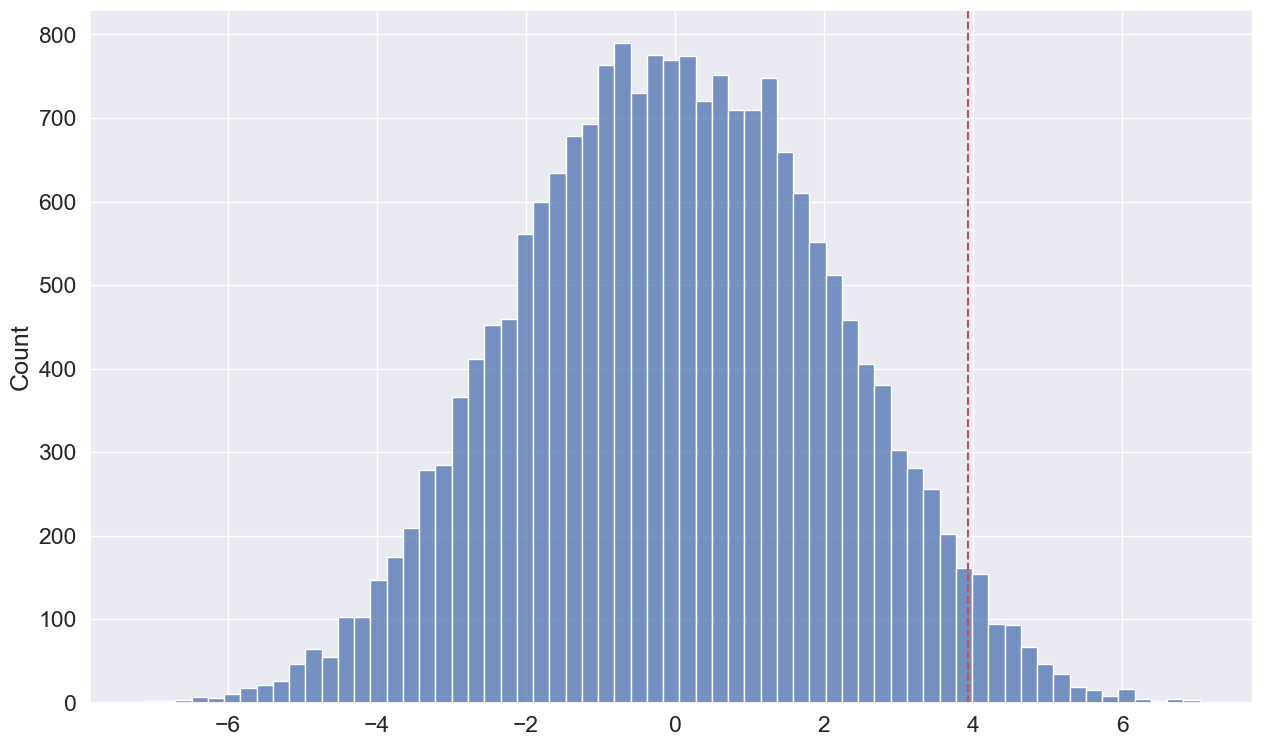

In [15]:
# let"s visualize the results
sns.histplot(mu_diff_samples)
plt.axvline(mu_diff, 0, 1, color="r", linestyle="--")
plt.show()

In [16]:
print("Results more extreme than observed:", sum([el >= mu_diff for el in mu_diff_samples]))
print("Total results:", len(mu_diff_samples))
p_value = sum([el > mu_diff for el in mu_diff_samples])/n
print("p-value:", sum([el >= mu_diff for el in mu_diff_samples]), "/", len(mu_diff_samples), "=", p_value)

Results more extreme than observed: 595
Total results: 20000
p-value: 595 / 20000 = 0.02975


In [17]:
alpha = 0.05   # let"s assume alpha in this case is 5%

if p_value <= alpha: 
    print("p-value <= alpha | the observed result is statistically significant | H0 rejected")
else: 
    print("p-value > alpha | the observed result is not statistically significant | could not reject H0")

p-value <= alpha | the observed result is statistically significant | H0 rejected


Through the permutation test, we can **reject our null hypothesis** that the average poultry consumption is equal to the average fish consumption.
This means that the **our initially observed result (average poultry consumption is higher than fish consumption) is statistically significant**.